SOLAR PHOTOVOLTAIC ENERGY GENERATION FORECAST

IMPORTING REQUIRED LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
!pip install scikeras

In [61]:
# df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

# date_col = 'date'
# output_power_col = 'instantaneous_output_power'


# df[date_col] = pd.to_datetime(df[date_col])
# df.sort_values(by=[date_col], inplace=True)
# df.reset_index(drop=True, inplace=True)

# features = df[[output_power_col]].values

# # Normalize the features using Min-Max scaling
# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(features)


# time_steps = 10
# num_features = scaled_features.shape[1]

# # Create sequences of data with the specified time steps
# X = []
# y = []

# for i in range(len(scaled_features) - time_steps):
#     X.append(scaled_features[i:i + time_steps])
#     y.append(scaled_features[i + time_steps])

# X = np.array(X)
# y = np.array(y)



# # Optionally, split the data into training and testing sets
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GENERAL FUNCTION CODE FOR RNN , LSTM, GRU

In [6]:
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN,GRU
df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


time_steps = 20
num_features = scaled_features.shape[1]

# Create sequences of data with the specified time steps
X = []
y = []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i + time_steps])
    y.append(scaled_features[i + time_steps])

X = np.array(X)
y = np.array(y)



# Optionally, split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a function to build and train each model
def build_model(model_type):
    model = Sequential()

    if model_type == "RNN":
        model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == "LSTM":
        model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == "GRU":
        model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

    model.add(Dense(1))  # Output layer with 1 neuron for regression

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the RNN model
rnn_model = build_model("RNN")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Build and train the LSTM model
lstm_model = build_model("LSTM")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Build and train the GRU model
gru_model = build_model("GRU")
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Calculate Mean Squared Error for each model
rnn_mse = mean_squared_error(y_test, rnn_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
gru_mse = mean_squared_error(y_test, gru_predictions)

print("RNN MSE:", rnn_mse)
print("LSTM MSE:", lstm_mse)
print("GRU MSE:", gru_mse)

<ipython-input-6-b2b784d404fb>:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])


Epoch 1/50
490/490 [==============================] - 6s 9ms/step - loss: 0.0257
Epoch 2/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0232
Epoch 3/50
490/490 [==============================] - 6s 12ms/step - loss: 0.0229
Epoch 4/50
490/490 [==============================] - 8s 16ms/step - loss: 0.0226
Epoch 5/50
490/490 [==============================] - 6s 12ms/step - loss: 0.0224
Epoch 6/50
490/490 [==============================] - 7s 14ms/step - loss: 0.0223
Epoch 7/50
490/490 [==============================] - 6s 13ms/step - loss: 0.0223
Epoch 8/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0219
Epoch 9/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0220
Epoch 10/50
490/490 [==============================] - 5s 9ms/step - loss: 0.0219
Epoch 11/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0218
Epoch 12/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0216
Epoch 13/50
490/490

PLOTTING ACTUAL VS PREDICTED VALUES

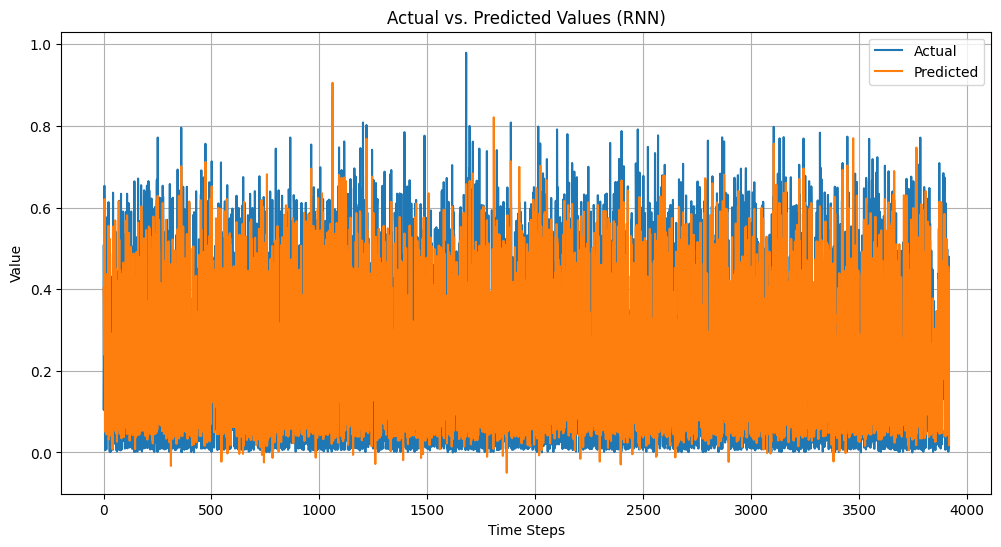

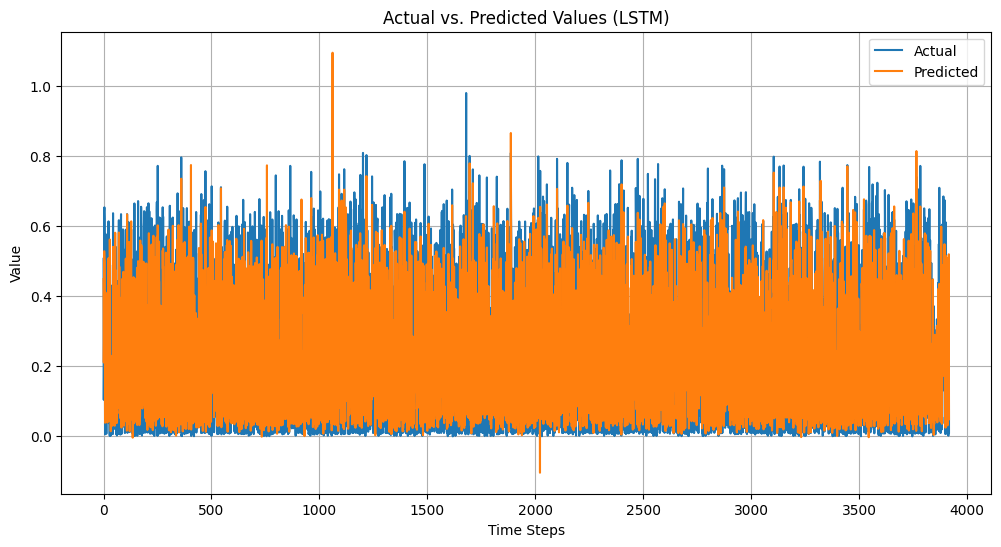

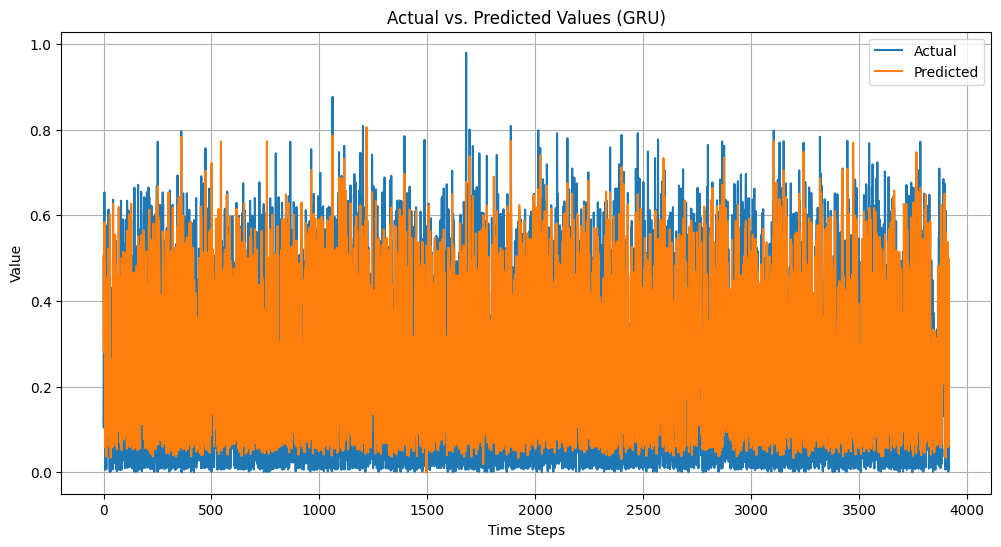

In [7]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values for RNN
plt.figure(figsize=(12, 6))
plt.title("Actual vs. Predicted Values (RNN)")
plt.plot(y_test, label="Actual")
plt.plot(rnn_predictions, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot the actual vs. predicted values for LSTM
plt.figure(figsize=(12, 6))
plt.title("Actual vs. Predicted Values (LSTM)")
plt.plot(y_test, label="Actual")
plt.plot(lstm_predictions, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot the actual vs. predicted values for GRU
plt.figure(figsize=(12, 6))
plt.title("Actual vs. Predicted Values (GRU)")
plt.plot(y_test, label="Actual")
plt.plot(gru_predictions, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


R2 Score for all 3 models

In [8]:
rnn_r2 = r2_score(y_test, rnn_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
gru_r2 = r2_score(y_test, gru_predictions)

print("RNN R2 Score:", rnn_r2)
print("LSTM R2 Score:", lstm_r2)
print("GRU R2 Score:", gru_r2)

RNN R2 Score: 0.6223743432079697
LSTM R2 Score: 0.6382971361898006
GRU R2 Score: 0.6331987987788115


In [9]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from scikeras.wrappers import KerasRegressor


HYPERPARAMETER TUNING USING GRID SEARCH ON RNN

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor


df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


time_steps = 20
num_features = scaled_features.shape[1]

# Create sequences of data with the specified time steps
X = []
y = []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i + time_steps])
    y.append(scaled_features[i + time_steps])

X = np.array(X)
y = np.array(y)

# Define the sequence length (number of time steps to consider)
sequence_length = 20

# Create sequences of data with the corresponding target values
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequences, targets = create_sequences(df['instantaneous_output_power'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Reshape input data to fit the model
X_train = X_train.reshape(-1, sequence_length, 1)

# Define your GRU model as a function:

def create_new_model(units=50, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.SimpleRNN(units, activation=activation, input_shape=(sequence_length, 1)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor based on your GRU model
rnn_regressor = KerasRegressor(build_fn=create_new_model,activation='relu',units=30)

# Define the hyperparameter grid for GridSearchCV:

param_grid = {
    'units': [50, 100, 150],  # Adjust the number of GRU units
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'optimizer': ['adam', 'rmsprop']  # Optimizers to try
}

# Create a GridSearchCV instance and fit it to your data:

# Create the GridSearchCV instance
grid = GridSearchCV(estimator=rnn_regressor, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score:

print("Best parameters found: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)



<ipython-input-11-ae16ab63340f>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


490/490 [==============================] - 4s 7ms/step - loss: 0.6763
Best parameters found:  {'activation': 'relu', 'optimizer': 'adam', 'units': 100}
Best score:  0.5955478357156391


HYPERPARAMETER TUNING USING GRID SEARCH ON LSTM

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor


df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


time_steps = 20
num_features = scaled_features.shape[1]

# Create sequences of data with the specified time steps
X = []
y = []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i + time_steps])
    y.append(scaled_features[i + time_steps])

X = np.array(X)
y = np.array(y)

# Define the sequence length (number of time steps to consider)
sequence_length = 20

# Create sequences of data with the corresponding target values
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequences, targets = create_sequences(df['instantaneous_output_power'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Reshape input data to fit the model
X_train = X_train.reshape(-1, sequence_length, 1)

# Define your GRU model as a function:

def create_new_model(units=50, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.LSTM(units, activation=activation, input_shape=(sequence_length, 1)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor based on your GRU model
lstm_regressor = KerasRegressor(build_fn=create_new_model,activation='relu',units=30)

# Define the hyperparameter grid for GridSearchCV:

param_grid = {
    'units': [50, 100, 150],  # Adjust the number of GRU units
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'optimizer': ['adam', 'rmsprop']  # Optimizers to try
}

# Create a GridSearchCV instance and fit it to your data:

# Create the GridSearchCV instance
grid = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score:

print("Best parameters found: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


<ipython-input-12-d2b3cec695aa>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


490/490 [==============================] - 13s 18ms/step - loss: 0.7063
Best parameters found:  {'activation': 'relu', 'optimizer': 'adam', 'units': 100}
Best score:  0.5838631693951416


HYPERPARAMETER TUNING USING GRID SEARCH ON GRU

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor


df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


time_steps = 20
num_features = scaled_features.shape[1]

# sequences of data with the specified time steps
X = []
y = []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i + time_steps])
    y.append(scaled_features[i + time_steps])

X = np.array(X)
y = np.array(y)

# Define the sequence length (number of time steps to consider)
sequence_length = 20

# sequences of data with the corresponding target values
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequences, targets = create_sequences(df['instantaneous_output_power'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Reshape input data to fit the model
X_train = X_train.reshape(-1, sequence_length, 1)

# GRU model as a function:

def create_new_model(units=50, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.GRU(units, activation=activation, input_shape=(sequence_length, 1)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a KerasRegressor based on your GRU model
gru_regressor = KerasRegressor(build_fn=create_new_model,activation='relu',units=30)

# Define the hyperparameter grid for GridSearchCV:

param_grid = {
    'units': [50, 100, 150],  # Adjust the number of GRU units
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'optimizer': ['adam', 'rmsprop']  # Optimizers to try
}

#  GridSearchCV instance
grid = GridSearchCV(estimator=gru_regressor, param_grid=param_grid, cv=3, n_jobs=-1)

# Fitting the GridSearchCV to the training data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score:

print("Best parameters found: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


<ipython-input-12-15afd07b0432>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


490/490 [==============================] - 16s 30ms/step - loss: 0.6803
Best parameters found:  {'activation': 'relu', 'optimizer': 'rmsprop', 'units': 150}
Best score:  0.5916346235354232


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN,GRU
df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


time_steps = 20
num_features = scaled_features.shape[1]

# Create sequences of data with the specified time steps
X = []
y = []

for i in range(len(scaled_features) - time_steps):
    X.append(scaled_features[i:i + time_steps])
    y.append(scaled_features[i + time_steps])

X = np.array(X)
y = np.array(y)



# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a function to build and train each model
def build_model(model_type):
    model = Sequential()

    if model_type == "RNN":
        model.add(SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.compile(optimizer='rmsprop', loss='mean_squared_error')
    elif model_type == "LSTM":
        model.add(LSTM(150, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.compile(optimizer='adam', loss='mean_squared_error')
    elif model_type == "GRU":
        model.add(GRU(150, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        model.compile(optimizer='rmsprop', loss='mean_squared_error')

    model.add(Dense(1))  # Output layer with 1 neuron for regression

    # model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the RNN model
rnn_model = build_model("RNN")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Build and train the LSTM model
lstm_model = build_model("LSTM")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Build and train the GRU model
gru_model = build_model("GRU")
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

#predictions
rnn_predictions_new = rnn_model.predict(X_test)
lstm_predictions_new = lstm_model.predict(X_test)
gru_predictions_new = gru_model.predict(X_test)

# Mean Squared Error for each model
rnn_mse_new = mean_squared_error(y_test, rnn_predictions)
lstm_mse_new = mean_squared_error(y_test, lstm_predictions)
gru_mse_new = mean_squared_error(y_test, gru_predictions)

print("RNN MSE:", rnn_mse_new)
print("LSTM MSE:", lstm_mse_new)
print("GRU MSE:", gru_mse_new)

<ipython-input-14-4c9d252c017a>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])


Epoch 1/50
490/490 [==============================] - 10s 16ms/step - loss: 0.0242
Epoch 2/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0233
Epoch 3/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0228
Epoch 4/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0225
Epoch 5/50
490/490 [==============================] - 4s 8ms/step - loss: 0.0223
Epoch 6/50
490/490 [==============================] - 4s 7ms/step - loss: 0.0223
Epoch 7/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0220
Epoch 8/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0221
Epoch 9/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0218
Epoch 10/50
490/490 [==============================] - 4s 9ms/step - loss: 0.0217
Epoch 11/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0217
Epoch 12/50
490/490 [==============================] - 3s 6ms/step - loss: 0.0216
Epoch 13/50
490/490 [==

R2 Score results after grid search cv

In [15]:
rnn_r2_new = r2_score(y_test, rnn_predictions_new)
lstm_r2_new = r2_score(y_test, lstm_predictions_new)
gru_r2_new = r2_score(y_test, gru_predictions_new)

print("RNN R2 Score:", rnn_r2_new)
print("LSTM R2 Score:", lstm_r2_new)
print("GRU R2 Score:", gru_r2_new)


RNN R2 Score: 0.6199775572244922
LSTM R2 Score: 0.6521716970321166
GRU R2 Score: 0.6232089740980612


In [14]:
# Display the first few elements of X and y
print("X (input data):")
print(X[:5])  # Print the first 5 sequences in X
print("\n")

print("y (target data):")
print(y)  # Print the first 5 target values in y


X (input data):
[[[0.56398077]
  [0.34722536]
  [0.30697822]
  [0.26689233]
  [0.22335659]
  [0.18212506]
  [0.14066846]
  [0.10166394]
  [0.06630867]
  [0.03209304]
  [0.0263566 ]
  [0.01906969]
  [0.01484044]
  [0.38791717]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]]

 [[0.34722536]
  [0.30697822]
  [0.26689233]
  [0.22335659]
  [0.18212506]
  [0.14066846]
  [0.10166394]
  [0.06630867]
  [0.03209304]
  [0.0263566 ]
  [0.01906969]
  [0.01484044]
  [0.38791717]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]]

 [[0.30697822]
  [0.26689233]
  [0.22335659]
  [0.18212506]
  [0.14066846]
  [0.10166394]
  [0.06630867]
  [0.03209304]
  [0.0263566 ]
  [0.01906969]
  [0.01484044]
  [0.38791717]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]
  [0.01445555]]

 [[0.26689233]
  [0.22335659]
  [0.18212506]
  [0.14066846]
  [0.10166394]
  [

SAVING THE MODELS FOR FURTHER FORECASTING

In [15]:
rnn_model.save('rnn_model.h5')
lstm_model.save('lstm_model.h5')
gru_model.save('gru_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model

# Load the saved models
loaded_rnn_model = load_model('rnn_model.h5')
loaded_lstm_model = load_model('lstm_model.h5')
loaded_gru_model = load_model('gru_model.h5')

In [18]:
rnn_predictions_loaded = loaded_rnn_model.predict(X_test)
lstm_predictions_loaded = loaded_lstm_model.predict(X_test)
gru_predictions_loaded = loaded_gru_model.predict(X_test)

123/123 [==============================] - 1s 5ms/step


FORECASTING

In [29]:
loaded_rnn_model = load_model('rnn_model.h5')
loaded_lstm_model = load_model('lstm_model.h5')
loaded_gru_model = load_model('gru_model.h5')


In [30]:
df = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

date_col = 'date'
output_power_col = 'instantaneous_output_power'


df[date_col] = pd.to_datetime(df[date_col])
df.sort_values(by=[date_col], inplace=True)
df.reset_index(drop=True, inplace=True)

features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-30-628702157b54>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[date_col] = pd.to_datetime(df[date_col])


In [45]:

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['time_in_seconds'] = df['Time'].dt.hour * 3600 + df['Time'].dt.minute * 60


In [46]:
df.dtypes

instantaneous_output_power               float64
instantaneous_global_radiation           float64
clearsky_Tamb                            float64
label                                      int64
modeled_power                            float64
power_mean                               float64
power_std                                float64
radiation_mean                           float64
radiation_std                            float64
simulate_mean                            float64
simulate_std                             float64
tprt_mean                                float64
tprt_std                                 float64
site_num                                   int64
date                              datetime64[ns]
Time                              datetime64[ns]
time_in_seconds                            int64
dtype: object

USING SAVED MODELS FOR FURTHER FORECASTING

In [62]:
# Replace 'historical_data' with your actual historical time series data
historical_data = df.drop(['date', 'Time'], axis=1)  # Exclude 'date' and 'time' columns

# Normalize the historical data
features = df[[output_power_col]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
historical_scaled_features = scaler.fit_transform(features)
# Initialize a sequence with historical data
sequence = historical_scaled_features[-time_steps:]

# Define the number of future time points to forecast
num_forecast_steps = 10

# Store the forecasts
forecasts_rnn = []
forecasts_lstm = []
forecasts_gru = []

# Perform forecasting for each future time point
for _ in range(num_forecast_steps):
    # Reshape the sequence for prediction
    sequence_for_prediction = np.array([sequence])

    # Reshape the sequence for prediction with the appropriate shape
    sequence_for_prediction = sequence_for_prediction.reshape(1, time_steps, 1)  # Assuming 1 feature

    # Make predictions for the next time point using your saved models
    forecast_rnn = loaded_rnn_model.predict(sequence_for_prediction)
    forecast_lstm = loaded_lstm_model.predict(sequence_for_prediction)
    forecast_gru = loaded_gru_model.predict(sequence_for_prediction)

    sequence = np.append(sequence, forecast_rnn)  # Choose the model you want to use here
    sequence = sequence[1:]  # Remove the first element to maintain the sequence length

    # Append the forecasts to the results
    forecasts_rnn.append(forecast_rnn)
    forecasts_lstm.append(forecast_lstm)
    forecasts_gru.append(forecast_gru)


1/1 [==============================] - 0s 24ms/step


NEW VALUES

In [63]:
print("RNN Forecasts:")
for forecast in forecasts_rnn:
    print(forecast)

print("\nLSTM Forecasts:")
for forecast in forecasts_lstm:
    print(forecast)

print("\nGRU Forecasts:")
for forecast in forecasts_gru:
    print(forecast)


RNN Forecasts:
[[0.42357206]]
[[0.3977828]]
[[0.37267247]]
[[0.33709767]]
[[0.32052308]]
[[0.31616035]]
[[0.28568763]]
[[0.27389777]]
[[0.24608181]]
[[0.25863522]]

LSTM Forecasts:
[[0.35890672]]
[[0.35600752]]
[[0.33222422]]
[[0.30254662]]
[[0.27339557]]
[[0.26381677]]
[[0.26554957]]
[[0.23218194]]
[[0.20982271]]
[[0.1985441]]

GRU Forecasts:
[[0.39304522]]
[[0.400993]]
[[0.37232503]]
[[0.34489986]]
[[0.31937432]]
[[0.30988777]]
[[0.31443748]]
[[0.30201152]]
[[0.29067448]]
[[0.2684746]]
